## CODE GIVEN TO US

In [2]:
import numpy as num;

import math;
import scipy.linalg as linalg;

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

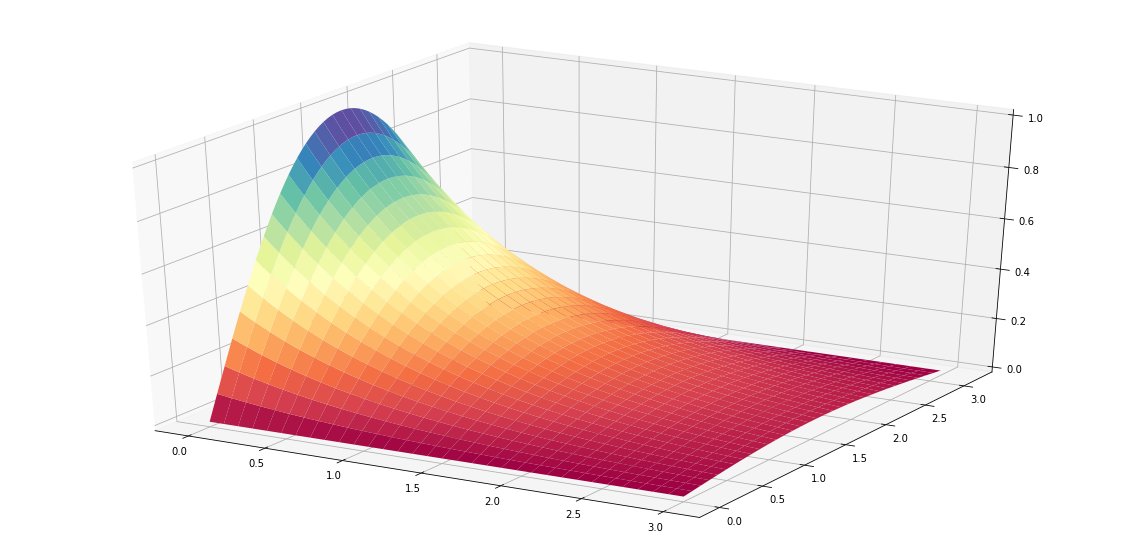

In [10]:
# Backward time central space (BTCS) implementation for heat equation over 
# the interval [0,pi] in space and [0,3] in time, with initial profile 
# sin(x), 0<=x<=pi and constant boundary conditions.


# Step 1. Define parameters 
L = math.pi; 
Nx = 64; 
dx = L/float(Nx);
T = 3.; 
Nt = 64; 
dt = T/float(Nt); 
alpha = dt/(dx**2);

# Step 2. Set up iteration matrix G as an array and invert

G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up an array containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile
U[:,0] = num.sin(num.linspace(dx,L-dx,Nx-1));

# Step 5. Boundary conditions (constant value of 0 at each boundary)
a = 0*num.ones(Nt+1);
b = 0*num.ones(Nt+1);

# Step 6. Set up the set of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 7. Compute the interior solution values 
for i in range(0,int(Nt)):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);


# Step 8. Append the boundary conditions to the solution array
U=num.r_[[a],U,[b]]

# Step 9. Display the values of the solution matrix U as a contour plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(0,T,Nt+1),num.linspace(0,L,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral')


plt.show()


--------------

### now change size in x direction to 100

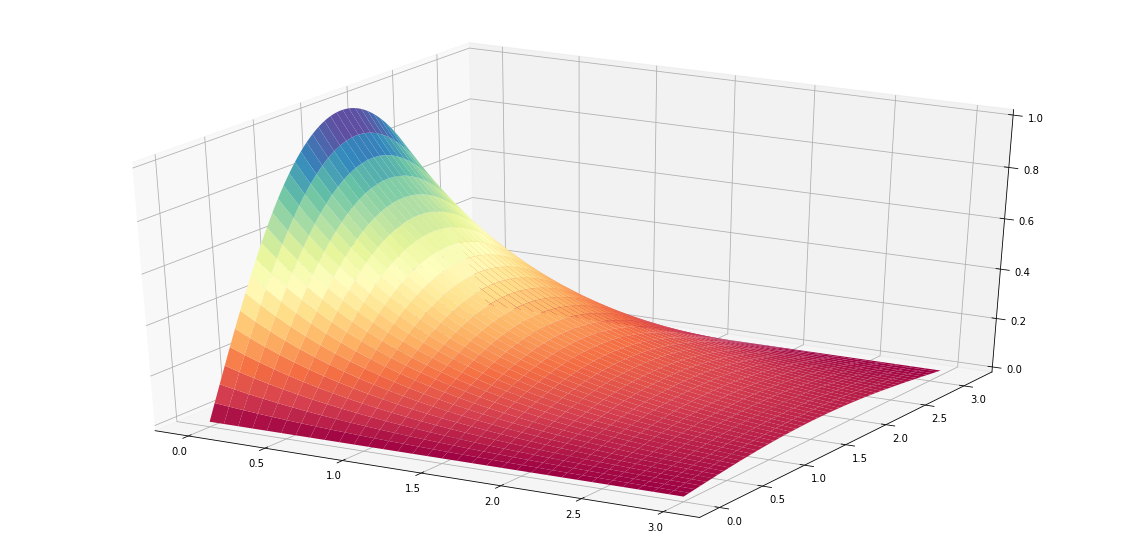

In [15]:
# Backward time central space (BTCS) implementation for heat equation over 
# the interval [0,pi] in space and [0,3] in time, with initial profile 
# sin(x), 0<=x<=pi and constant boundary conditions.


# Step 1. Define parameters 
L = math.pi; 
Nx = 1000; 
dx = L/float(Nx);
T = 3.; 
Nt = 64; 
dt = T/float(Nt); 
alpha = dt/(dx**2);

# Step 2. Set up iteration matrix G as an array and invert

G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up an array containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile
U[:,0] = num.sin(num.linspace(dx,L-dx,Nx-1));

# Step 5. Boundary conditions (constant value of 0 at each boundary)
a = 0*num.ones(Nt+1);
b = 0*num.ones(Nt+1);

# Step 6. Set up the set of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 7. Compute the interior solution values 
for i in range(0,int(Nt)):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);


# Step 8. Append the boundary conditions to the solution array
U=num.r_[[a],U,[b]]

# Step 9. Display the values of the solution matrix U as a contour plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

X,Y=num.meshgrid(num.linspace(0,T,Nt+1),num.linspace(0,L,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral')


plt.show()


Implicit scheme is unconditionally stable so a change in x shouldn't effect it

-------------------------

## Modify scheme to change initial conditions and boundary conditions

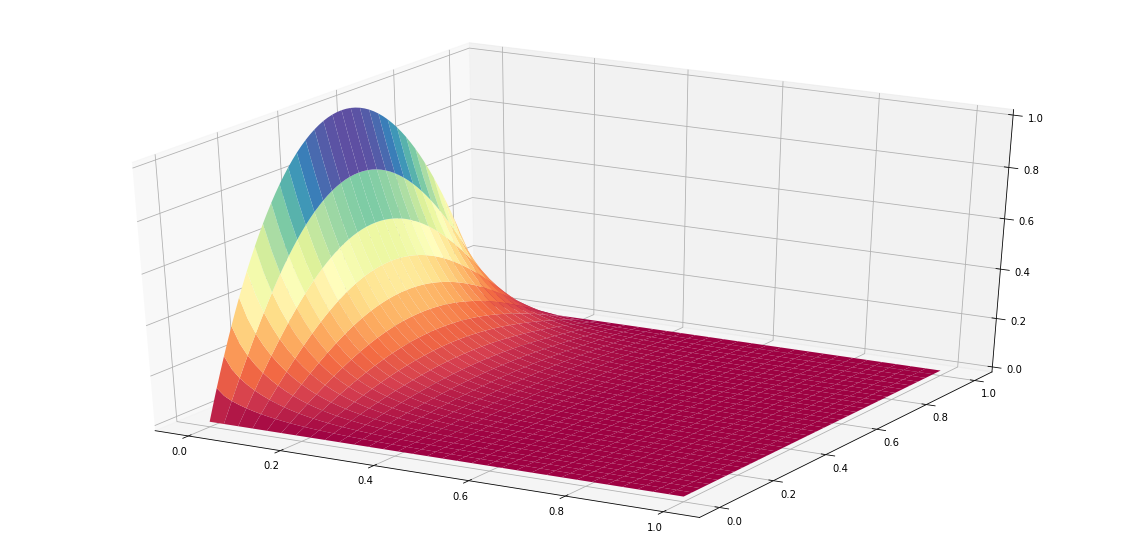

In [26]:
# Backward time central space (BTCS) implementation for heat equation over 
# the interval [0,pi] in space and [0,3] in time, with initial profile 
# sin(x), 0<=x<=pi and constant boundary conditions.


# Step 1. Define parameters 
L = 1; #length of spatial domain
Nx = 64; 
dx = L/float(Nx);
T = 1.; 
Nt = 64; 
dt = T/float(Nt); 
alpha = dt/(dx**2);

# Step 2. Set up iteration matrix G as an array and invert
#G --> tri-diagonal matrix
G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up an array containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile
x = num.linspace(dx,L-dx,Nx-1)
U[:,0] = -4*(x-1/2)**2+1;

# Step 5. Boundary conditions (constant value of 0 at each boundary)
a = 0*num.ones(Nt+1);
b = 0*num.ones(Nt+1);

# Step 6. Set up the set of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 7. Compute the interior solution values 
for i in range(0,int(Nt)):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);


# Step 8. Append the boundary conditions to the solution array
U=num.r_[[a],U,[b]]

# Step 9. Display the values of the solution matrix U as a contour plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

#creates a 2 dimensional array
X,Y=num.meshgrid(num.linspace(0,T,Nt+1),num.linspace(0,L,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral')


plt.show()


## Modify again for e(-x^2/2)

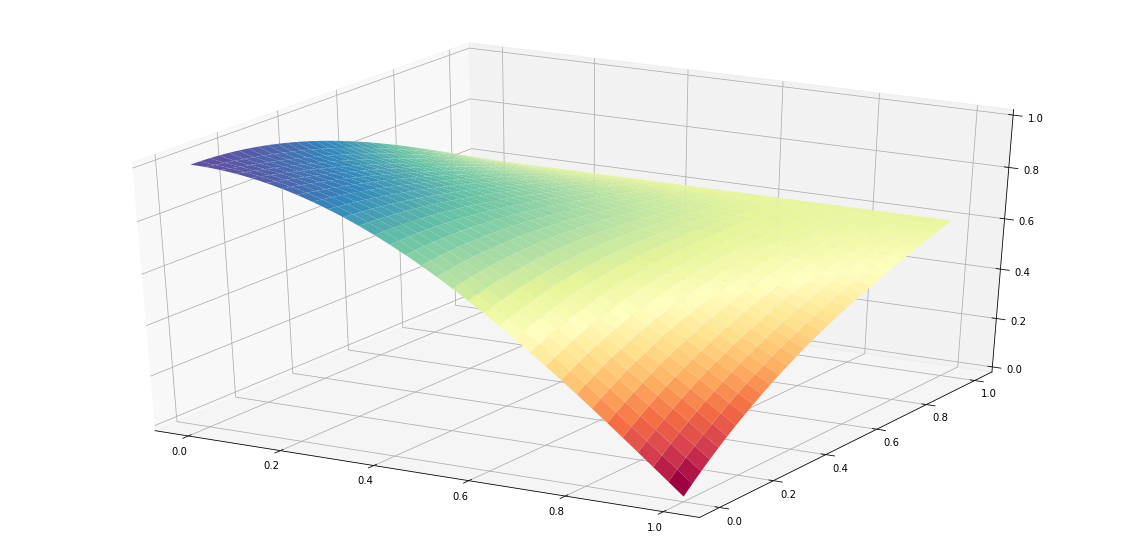

In [29]:
# Backward time central space (BTCS) implementation for heat equation over 
# the interval [0,pi] in space and [0,3] in time, with initial profile 
# sin(x), 0<=x<=pi and constant boundary conditions.


# Step 1. Define parameters 
L = 1; #length of spatial domain
Nx = 64; 
dx = L/float(Nx);
T = 1; 
Nt = 64; 
dt = T/float(Nt); 
alpha = dt/(dx**2);

# Step 2. Set up iteration matrix G as an array and invert
#G --> tri-diagonal matrix
G = (1+2*alpha)*num.eye(Nx-1,Nx-1) - alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);

# Step 3. Set up an array containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile
x = num.linspace(dx,L-dx,Nx-1)
U[:,0] = num.exp((-x**2)/2);

# Step 5. Boundary conditions (constant value of 0 at each boundary)
t = num.linspace(0,T,Nt+1)
a = num.cos(num.pi*t/2)*num.ones(Nt+1);
b = 1/num.sqrt(num.exp(1))*num.ones(Nt+1);

# Step 6. Set up the set of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 7. Compute the interior solution values 
for i in range(0,int(Nt)):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);


# Step 8. Append the boundary conditions to the solution array
U=num.r_[[a],U,[b]]

# Step 9. Display the values of the solution matrix U as a contour plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

#creates a 2 dimensional array
X,Y=num.meshgrid(num.linspace(0,T,Nt+1),num.linspace(0,L,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral')


plt.show()


## Crank Nicolson Scheme

In [ ]:
# Backward time central space (BTCS) implementation for heat equation over 
# the interval [0,pi] in space and [0,3] in time, with initial profile 
# sin(x), 0<=x<=pi and constant boundary conditions.


# Step 1. Define parameters 
L = 1; #length of spatial domain
Nx = 64; 
dx = L/float(Nx);
T = 1; 
Nt = 64; 
dt = T/float(Nt); 
alpha = dt/(dx**2);

# Step 2. Set up iteration matrix G as an array and invert
#G --> tri-diagonal matrix
# change this for Crank Nicolson

G = (1+alpha)*num.eye(Nx-1,Nx-1) - (1/2)*alpha*num.diag(num.ones(Nx-2),1) - alpha*num.diag(num.ones(Nx-2),-1);
Ginv=linalg.inv(G);
F = 

# Step 3. Set up an array containing the interior solution values U(n*dx, m*dt)
U = num.zeros((Nx-1,Nt+1));

# Step 4. Define the initial profile
x = num.linspace(dx,L-dx,Nx-1)
U[:,0] = num.exp((-x**2)/2);

# Step 5. Boundary conditions (constant value of 0 at each boundary)
t = num.linspace(0,T,Nt+1)
a = num.cos(num.pi*t/2)*num.ones(Nt+1);
b = 1/num.sqrt(num.exp(1))*num.ones(Nt+1);

# Step 6. Set up the set of vectors q containing the boundary conditions
# and populate the first and last row.  
q=num.zeros((Nx-1,Nt+1));
q[0,:]=alpha*a; 
q[Nx-2,:]=alpha*b;


# Step 7. Compute the interior solution values 
for i in range(0,int(Nt)):
    U[:,i+1] = Ginv.dot(U[:,i])+Ginv.dot(q[:,i+1]);


# Step 8. Append the boundary conditions to the solution array
U=num.r_[[a],U,[b]]

# Step 9. Display the values of the solution matrix U as a contour plot

fig = plt.figure(figsize = (20,10))
ax = plt.axes(projection='3d')

#creates a 2 dimensional array
X,Y=num.meshgrid(num.linspace(0,T,Nt+1),num.linspace(0,L,Nx+1))

ax.plot_surface(X,Y,U,cmap='Spectral')


plt.show()
